**DATA DIRI**

> 
*   Nama   : Arini Ratnasari
*   Email  : ariniratnasari02@gmail.com
*   Alamat : BTN Puskopad Sukajaya Blok C No 26 RT/RW 59/17, Jawa Barat
*   TTL    : Subang, 10 Agustus 2000

**Import Data**

In [ ]:
# Mengimport data menggunakan library pandas
import pandas as pd
df_bbc = pd.read_csv('bbc-news-data.csv',sep='\t')
df_bbc.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


**Eksplorasi Data**

In [ ]:
df_bbc.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

In [ ]:
df_bbc.shape

(2225, 4)

In [ ]:
df_bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [ ]:
df_bbc.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
# Menghapus kolom yang tidak digunakan untuk melatih model
df_bbcnew = df_bbc.drop(columns=['filename'])
df_bbcnew

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


**Preprocessing Data**

In [ ]:
# Mengimport and mengunduh library
import nltk, os, re, string

from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Membuat lower-case untuk semua huruf
df_bbcnew.title = df_bbcnew.title.apply(lambda x: x.lower())
df_bbcnew.content = df_bbcnew.content.apply(lambda x: x.lower())

# Menghapuskan tanda baca
def cleaner(data):
  return(data.translate(str.maketrans('','', string.punctuation)))
  df_bbcnew.title = df_bbcnew.title.apply(lambda x: cleaner(x))
  df_bbcnew.content = df_bccnew.content.apply(lambda x: lem(x))

# Mereduksi sebuah kata menjadi Lemma, atau bentuk kanonisnya (Lemmatization)
my_lemmatizer = WordNetLemmatizer()

def lem(data):
  my_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
  return(' '.join([my_lemmatizer.lemmatize(w, my_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
  df_bbcnew.title = df_bbcnew.title.apply(lambda x: lem(x))
  df_bbcnew.content = df_bbcnew.content.apply(lambda x: lem(x))

# Menghapus angka
def hapus_angka(data):
  return re.sub('[0-9]+','',data)
  df_bbcnew['title'].apply(hapus_angka)
  df_bbcnew['content'].apply(hapus_angka)

# Menghapus kata yang diabaikan dalam pelatihan (Stopwords)
list_stwords = stopwords.words()

def stopword(data):
  return(' '.join([w for w in data.split() if w not in list_stwords]))
  df_bbcnew.title = df_bbcnew.title.apply(lambda x: stopword(x))
  df_bbcnew.content = df_bbcnew.content.apply(lambda x: lem(x))

In [ ]:
 # Mwlihat data setelah data dibersihkan
 df_bbcnew.head(10)

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...
5,business,japan narrowly escapes recession,japan's economy teetered on the brink of a te...
6,business,jobs growth still slow in the us,the us created fewer jobs than expected in ja...
7,business,india calls for fair trade rules,"india, which attends the g7 meeting of seven ..."
8,business,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...
9,business,court rejects $280bn tobacco case,a us government claim accusing the country's ...


In [ ]:
# Membuat data kategori dengan one-hot-encoding
my_category = pd.get_dummies(df_bbcnew.category)
df_bbcnew_cat = pd.concat([df_bbcnew, my_category], axis=1)
df_bbcnew_cat = df_bbcnew_cat.drop(columns='category')
df_bbcnew_cat.head(10)

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0
5,japan narrowly escapes recession,japan's economy teetered on the brink of a te...,1,0,0,0,0
6,jobs growth still slow in the us,the us created fewer jobs than expected in ja...,1,0,0,0,0
7,india calls for fair trade rules,"india, which attends the g7 meeting of seven ...",1,0,0,0,0
8,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...,1,0,0,0,0
9,court rejects $280bn tobacco case,a us government claim accusing the country's ...,1,0,0,0,0


In [ ]:
# Mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array
news = df_bbcnew_cat['title'].values + '' + df_bbcnew_cat['content'].values
label = df_bbcnew_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
# Melihat array dari news
news

array(['ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december, from $639m year-earlier.  the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sig

In [ ]:
# Melihat array dari label
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
# Split data menjadi data training dan data validation
from sklearn.model_selection import train_test_split
bbc_train, bbc_test, mylabel_train, mylabel_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [ ]:
# Mengubah setiap kata pada dataset ke dalam bilangan numerik dengan fungsi Tokenizer.
mytokenizer = Tokenizer(num_words = 5000, oov_token = 'x', filters = '!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
mytokenizer.fit_on_texts(bbc_train)
mytokenizer.fit_on_texts(bbc_test)

# Mengonversi setiap sampel menjadi sequence.
seq_train = mytokenizer.texts_to_sequences(bbc_train)
seq_test = mytokenizer.texts_to_sequences(bbc_test)

# Melakukan padding agar setiap kalimat pada teks memiliki panjang yang seragam.
pad_train = pad_sequences(seq_train)
pad_test = pad_sequences(seq_test)

**Membuat Arsitektur Model**

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', 
              metrics=['accuracy'], 
              loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [18]:
# Melatih model kita dengan memanggil fungsi fit()
histori_model = model.fit(pad_train, mylabel_train, epochs = 40,
                          validation_data = (pad_test, mylabel_test),
                          verbose = 2, 
                          callbacks = [callbacks], validation_steps = 30)

Epoch 1/40
56/56 - 268s - loss: 1.5982 - accuracy: 0.2494 - val_loss: 1.5716 - val_accuracy: 0.3640
Epoch 2/40
56/56 - 267s - loss: 1.2947 - accuracy: 0.4410 - val_loss: 1.0930 - val_accuracy: 0.5820
Epoch 3/40
56/56 - 266s - loss: 0.7605 - accuracy: 0.7371 - val_loss: 0.5496 - val_accuracy: 0.8315
Epoch 4/40
56/56 - 265s - loss: 0.3919 - accuracy: 0.8618 - val_loss: 0.7622 - val_accuracy: 0.7326
Epoch 5/40
56/56 - 261s - loss: 0.2610 - accuracy: 0.9197 - val_loss: 0.5288 - val_accuracy: 0.8404
Epoch 6/40
56/56 - 260s - loss: 0.0796 - accuracy: 0.9803 - val_loss: 0.5938 - val_accuracy: 0.8382
Epoch 7/40
56/56 - 265s - loss: 0.0369 - accuracy: 0.9893 - val_loss: 0.5277 - val_accuracy: 0.8764
Epoch 8/40
56/56 - 268s - loss: 0.0498 - accuracy: 0.9871 - val_loss: 0.6498 - val_accuracy: 0.8404
Epoch 9/40
56/56 - 284s - loss: 0.0456 - accuracy: 0.9899 - val_loss: 0.6424 - val_accuracy: 0.8539
Epoch 10/40
56/56 - 262s - loss: 0.0181 - accuracy: 0.9961 - val_loss: 0.6407 - val_accuracy: 0.8517

**Plot Akurasi dan Loss**

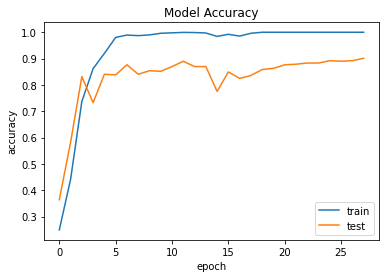

In [20]:
# Plot dari akurasi
import matplotlib.pyplot as plt
plt.plot(histori_model.history['accuracy'])
plt.plot(histori_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

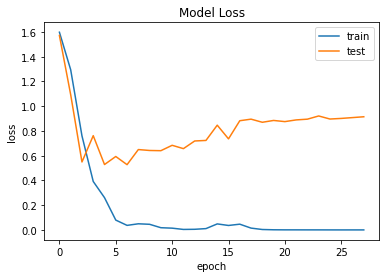

In [21]:
# Plot dari loss
plt.plot(histori_model.history['loss'])
plt.plot(histori_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()